In [2]:
'''
ライブラリのインポート
'''
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import load_model
from PIL import Image

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def dataset_load():
    '''
    画像データのインポート
    &
    訓練データ、テストデータ、予測データ
    '''
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)
    
    test_datagen = ImageDataGenerator(rescale = 1./255)
    predict_datagen = ImageDataGenerator(rescale = 1./255)
    
    training_set = train_datagen.flow_from_directory('train',
                                                     target_size = (256, 256),
                                                     batch_size = 32,
                                                     class_mode="categorical")
    
    test_set = test_datagen.flow_from_directory('test',
                                                target_size = (256, 256),
                                                batch_size = 32,
                                                class_mode="categorical")
    
    predict_set = predict_datagen.flow_from_directory('predict',
                                                      target_size=(256, 256),
                                                      batch_size=32,
                                                      class_mode="categorical")
    label_dict = training_set.class_indices
    return training_set, test_set, predict_set, label_dict

In [4]:
def model_set1():
    '''
    CNNの構築
    '''
    model = Sequential()
    # 畳み込み層
    '''
    このレイヤーをモデルの第1層に使うときは
    キーワード引数input_shape （整数のタプル，サンプル軸を含まない）を指定してください．
    keras.layers.Conv2D(filters,
                        kernel_size,
                        strides=(1, 1),
                        padding='valid',
                        data_format=None,
                        dilation_rate=(1, 1),
                        activation=None,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None
                        bias_constraint=None)
    '''
    model.add(Conv2D(filters=32, strides=2, input_shape=(256, 256, 3), activation='relu'))

    model.add(Conv2D(filters=32, strides=2, activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, strides=3, activation='relu'))
    model.add(Conv2D(filters=64, strides=3, activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 平滑化
    model.add(Flatten())

    # 全結合層
    '''
    keras.layers.Dense(units,
                       activation=None, 
                       use_bias=True, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='zeros', 
                       kernel_regularizer=None, 
                       bias_regularizer=None, 
                       activity_regularizer=None, 
                       kernel_constraint=None, 
                       bias_constraint=None)
    '''
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    # コンパイル
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def fit_evaluate(model, train, test, epoch, model_name='jeanne_model_1.hdf5'):
    '''
    学習
    '''
    hist = model.fit_generator(train,
                               epochs=epoch,
                               verbose=2,
                               validation_data=test)
    
    '''
    モデルの評価
    '''
    score = model.evaluate_generator(test_set)
    
    print('正答率＝', score[1], 'loss=', score[0])
    
    #modelの保存
    model.save(model_name)
    
    '''
    学習の様子をグラフへ描画
    '''
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('hist_acc.png')
    plt.show()
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.savefig('hist_loss.png')
    plt.show()
    return hist, score

In [10]:
def model_loader():
    model = load_model('jeanne_model.hdf5')
    return model

In [11]:
def check_jeanne(url, model):
    # 対象画像のインポート
    img = Image.open(url)
    img = img.convert("RGB")
    img = img.resize((256, 256))
    plt.imshow(img)
    plt.show()

    x = np.asarray(img)
    x = x.reshape(-1, 256, 256, 3)
    x = x / 255

    # 予測
    pre = model.predict(x)
    idx = np.argmax(pre, axis=1)[0]
    per = int(pre[0][idx] * 100)
    return (idx, per, img)

def check_jeanne_result(url, model, label):
    idx, per, img = check_jeanne(url, model)
    labels = []
    for get_key in label.keys():
        labels.append(get_key)
    #答えを表示
    print("この写真は、", labels[idx])
    print(per, "%の可能性で合っているだろう")

Found 240 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


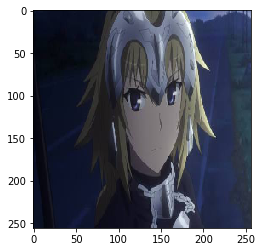

この写真は、 Jeanne
54 %の可能性で合っているだろう


In [13]:
select = 1
if (select == 0):
    model = model_set()
    train, test, predict, label = dataset_load()
    hist, score = fit_evaluate(model, train, test, epoch=20, model_name='jeanne_model_1.hdf5')
elif select == 1:
    train, test, predict, label = dataset_load()
    model = model_loader()
    check_jeanne_result('train/Jeanne/IMG_0409.JPG', model, label)

In [ ]:
def model_set2():
    '''
    CNNの構築
    '''
    model = Sequential()
    # 畳み込み層
    '''
    このレイヤーをモデルの第1層に使うときは
    キーワード引数input_shape （整数のタプル，サンプル軸を含まない）を指定してください．
    keras.layers.Conv2D(filters,
                        kernel_size,
                        strides=(1, 1),
                        padding='valid',
                        data_format=None,
                        dilation_rate=(1, 1),
                        activation=None,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None
                        bias_constraint=None)
    '''
    #1
    model.add(Conv2D(filters=32, kernel_size=8, strides=1, padding='same', input_shape=(256, 256, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #2
    model.add(Conv2D(filters=64, kernel_size=4, strides=2, padding='same', activation='relu'))

    #3
    model.add(Conv2D(filters=64, kernel_size=4, strides=2, padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #4
    model.add(Conv2D(filters=128, kernel_size=2, strides=3, padding='same', activation='relu'))
    #5
    model.add(Conv2D(filters=128, kernel_size=2, strides=3, padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    
    # 平滑化
    model.add(Flatten())

    # 全結合層
    '''
    keras.layers.Dense(units,
                       activation=None, 
                       use_bias=True, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='zeros', 
                       kernel_regularizer=None, 
                       bias_regularizer=None, 
                       activity_regularizer=None, 
                       kernel_constraint=None, 
                       bias_constraint=None)
    '''
    model.add(Dense(128*2, activation='relu'))
    model.add(Dense(128*2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    #出力層
    model.add(Dense(3, activation='softmax'))

    # コンパイル
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_set2()
model.summary()